In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from anomalydetector_evt.SPOT import SPOT

## CASO 1

In [2]:
# Generar datos
np.random.seed(123)
data = np.random.normal(1000, 30, size=10000)

# Agregar anomalia
data[4600:5000] = data[4600:5000] * 1.5

[]

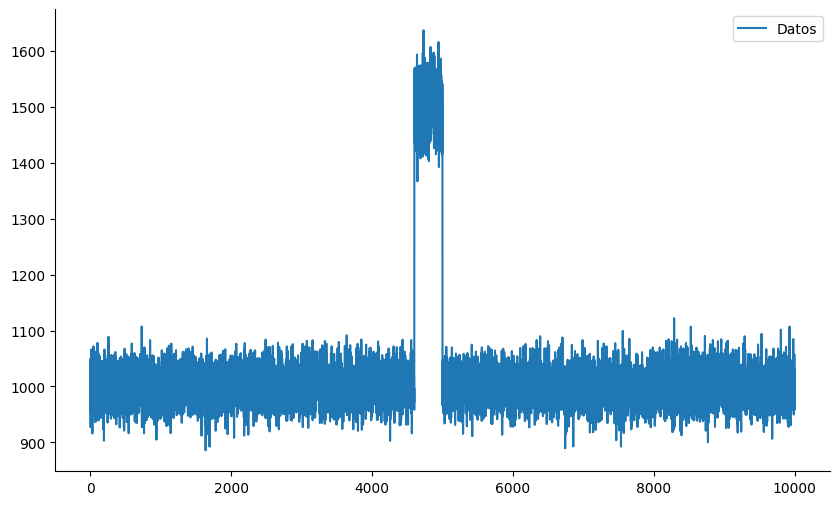

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data, label = 'Datos')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.xlim(0, 3000)
plt.legend()
plt.plot()

In [4]:
n_init = round(len(data) * 0.1) # 10% para entrenamiento
data_init = data[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = SPOT(data_init, p=0.98, q=5e-4)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el zq inicial
excs = 0

x = []
for i in range(n_init, len(data)):
    try:
        new_value = data[i]
        anomalia = anomalydetector.update(new_value)

        if anomalia:
            x += [i]

    except Exception as e:
        excs += 1

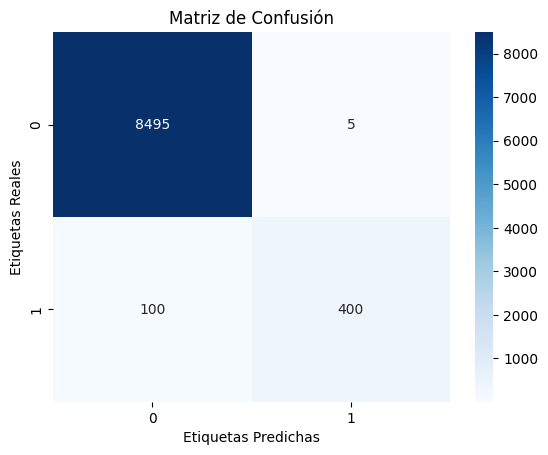

Accuracy: 0.99
Precision: 0.99
Recall: 0.80
F1 Score: 0.88


In [5]:
y_true = [1 if i in range(4500, 5000) else 0 for i in range(1000, 10000)]
y_pred = [1 if i in x else 0 for i in range(1000, 10000)]

# Matriz de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Calcular métricas adicionales
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Visualizar la matriz de confusión con seaborn
labels = np.unique(np.concatenate((y_true, y_pred)))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

# Imprimir métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

[]

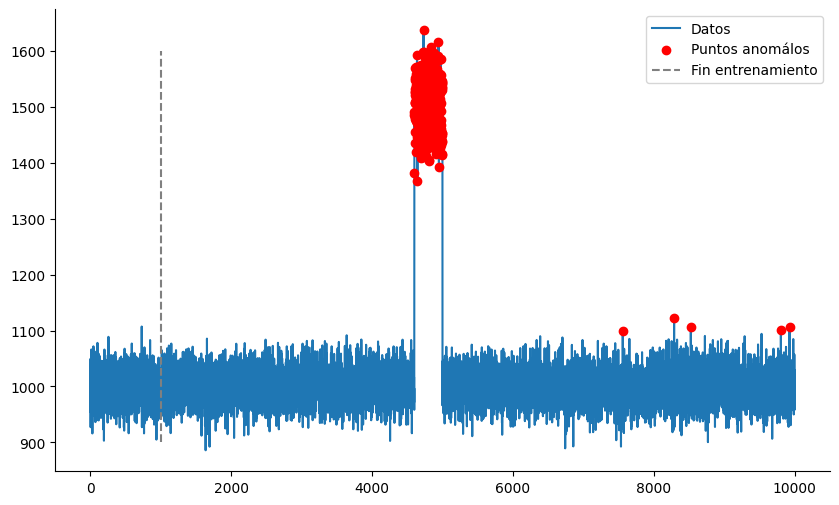

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(data, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='red', label='Puntos anomálos', zorder=2)
plt.vlines(x=1000, ymin=900, ymax=1600, color='gray', linestyle='dashed', label='Fin entrenamiento', )

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.xlim(0, 3000)
plt.legend()
plt.plot()

## CASO 2 

Datos simulados obtenidos de la base de datos Numenta Anomaly Benchmark.

In [7]:
data2 = pd.read_csv('data/art_daily_jumpsup.csv')
data2.set_index("timestamp", inplace=True)

# Obtener los indices de las anomalias 
data_anomalias = data2.loc["2014-04-11 08:50:00":"2014-04-11 19:30:00"]
idx = [data2.index.get_loc(date) for date in data_anomalias.index]

# Guardar los valores
data2.reset_index(drop=True, inplace=True)
data2 = data2.value

In [8]:
n_init = round(len(data2) * 0.2) # 10% para entrenamiento
data_init = data2[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = SPOT(data_init, p=0.98, q=5e-4)

# Iniciamos (POT)
anomalydetector.init()

# Guardar el número de veces que no se encontró solución
excs = 0

x = [] # indices de las anomalías
for i in range(n_init, len(data2)):

    try:
        # Nuevo valor
        new_value = data2[i]

        # Verificar anomalía
        anomalia = anomalydetector.update(new_value)

        # Si hay anomalía se guarda el índice (para el gráfico)
        if anomalia:
            x.append(i)

    # Si no existe solución 
    except Exception as e:
        excs += 1

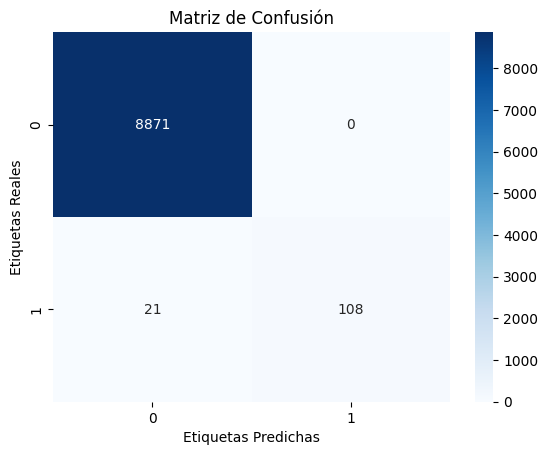

Accuracy: 1.00
Precision: 1.00
Recall: 0.84
F1 Score: 0.91


In [9]:
y_true = [1 if i in idx else 0 for i in range(1000, 10000)]
y_pred = [1 if i in x else 0 for i in range(1000, 10000)]

# Matriz de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Calcular métricas adicionales
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Visualizar la matriz de confusión con seaborn
labels = np.unique(np.concatenate((y_true, y_pred)))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

# Imprimir métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

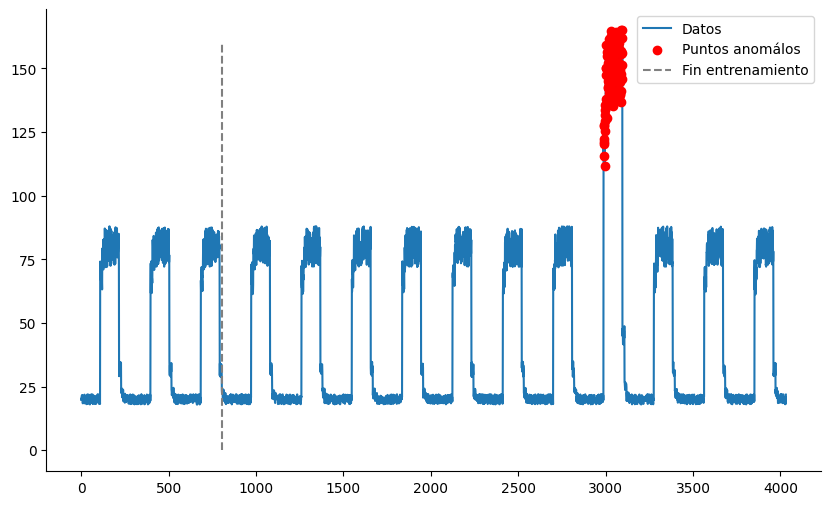

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(data2, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='r', label='Puntos anomálos', zorder=2)
plt.vlines(x=n_init, ymin=0, ymax=160, color='gray', linestyle='dashed', label='Fin entrenamiento')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()